# Vpogled v nepremičnine: Analiza slovenskega nepremičninskega trga

Ta projekt si prizadeva zagotoviti poglobljeno analizo slovenskega nepremičninskega trga, s poudarkom na prodaji in dolgoročnem najemu. Podatki za to analizo so bili pridobljeni s spletnega mesta https://www.nepremicnine.net/, ki zajema širok spekter nepremičninskih oglasov.

Z uporabo knjižnice Pandas v programskem jeziku Python znotraj okolja Jupyter Notebook bo projekt raziskal ključne tržne trende, cenovne vzorce in geografsko razporeditev nepremičnin. S pomočjo vizualizacije teh podatkov in izvedbe statističnih analiz bo projekt poskušal ponuditi dragocene vpoglede v dinamiko slovenskega nepremičninskega trga, kar bi lahko pomagalo kupcem, najemnikom in vlagateljem pri sprejemanju premišljenih odločitev.

# Vsebina
1. [Pregled trga](#Pregled-trga)
   - [Razporeditev oglasov po tipih (prodaja/oddaja)](#Razporeditev-oglasov-po-tipih-(prodaja/oddaja))
   - [Razporeditev oglasov po tipu nepremičnine (hiša/stanovanje)](#Razporeditev-oglasov-po-tipu-nepremičnine-(hiša/stanovanje))
   - [Geografska razporeditev](#Geografska-razporeditev)
2. [Analiza cen](#Analiza-cen)
   - [Razporeditev cen](#Razporeditev-cen)
     - [Razporeditev cen (prodaja)](#Razporeditev-cen-(prodaja))
     - [Razporeditev cen (oddaja)](#Razporeditev-cen-(oddaja))
   - [Povprečne in mediane cene](#Povprečne-in-mediane-cene)
     - [Povprečne in mediane cene (prodaja)](#Povprečne-in-mediane-cene-(prodaja))
     - [Povprečne in mediane cene (oddaja)](#Povprečne-in-mediane-cene-(oddaja))
   - [Regionalne razlike v cenah](#Regionalne-razlike-v-cenah)
     - [Regionalne razlike v cenah (prodaja)](#Regionalne-razlike-v-cenah-(prodaja))
     - [Regionalne razlike v cenah (oddaja)](#Regionalne-razlike-v-cenah-(oddaja))
3. [Analiza značilnosti nepremičnin](#Poglavje-3)
   - [Leto gradnje](#Leto-gradnje)
     

### Uvoz podatkov in prilagoditev

In [406]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

df = pd.read_csv('data/ads.csv', index_col='ad_id')
sell_df = df[df['ad_type'] == 'prodaja']
rent_df = df[df['ad_type'] == 'oddaja']
pd.options.display.max_rows = 20

In [277]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7535 entries, 6832201 to 6732170
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ad_type           7535 non-null   object 
 1   real_estate_type  7535 non-null   object 
 2   region            7535 non-null   object 
 3   city              7535 non-null   object 
 4   type              7535 non-null   object 
 5   living_area       7535 non-null   float64
 6   land_area         3613 non-null   float64
 7   floor             5726 non-null   object 
 8   building_year     7535 non-null   int64  
 9   price             7535 non-null   float64
 10  seller            7535 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 706.4+ KB


,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6832201,prodaja,stanovanje,ljubljana mesto,ljubljana,2-sobno,53.0,NaN,1/2,1981,185000.0,baza agencija d.o.o.
6842595,prodaja,stanovanje,ljubljana mesto,ljubljana,3-sobno,54.3,NaN,1/2,1880,185000.0,mesto nepremičnin d.o.o.
6832191,prodaja,stanovanje,ljubljana mesto,ljubljana,2-sobno,56.2,NaN,1/2,1981,213500.0,baza agencija d.o.o.
6735065,prodaja,stanovanje,ljubljana mesto,ljubljana,2-sobno,57.3,NaN,9,1965,279000.0,"aeon nepremičnine, d.o.o."
6758505,prodaja,stanovanje,ljubljana mesto,ljubljana,"2,5-sobno",59.4,NaN,3/3,1926,279000.0,print trade d.o.o.


***
# Pregled trga

Ta razdelek zagotavlja pregled trga nepremičnin z analizo razporeditve oglasov po tipu (prodaja ali oddaja), tipu nepremičnine (hiša ali stanovanje) in geografski lokaciji. Razumevanje teh razporeditev pomaga pri prepoznavanju ključnih tržnih trendov in relativne razpoložljivosti različnih vrst nepremičnin v različnih regijah.

## Razporeditev oglasov po tipih (prodaja/oddaja)

Najprej si oglejmo razmerje med oglasi za prodajo in oddajo. Podatke bomo vizualizirali, da bomo videli, kako je trg razdeljen med tema dvema kategorijama.

<Axes: title={'center': 'Razporeditev oglasov po tipih (prodaja/oddaja)'}>

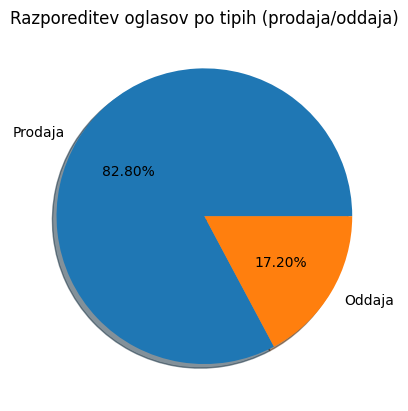

In [278]:
df['ad_type'].value_counts().plot.pie(
    title='Razporeditev oglasov po tipih (prodaja/oddaja)',
    labels=['Prodaja', 'Oddaja'],
    autopct='%.2f%%',
    shadow=True,        
    ylabel='',    
)

In [279]:
df['ad_type'].value_counts()

ad_type
prodaja    6239
oddaja     1296
Name: count, dtype: int64

## Razporeditev oglasov po tipu nepremičnine (hiša/stanovanje)

Zdaj si oglejmo razporeditev oglasov med hišami in stanovanji. Ta analiza nam bo pomagala razumeti relativno razpoložljivost različnih vrst nepremičnin na trgu in ali obstaja prednost enega tipa pred drugim.

<Axes: title={'center': 'Razporeditev oglasov po tipu nepremičnine (hiša/stanovanje)'}>

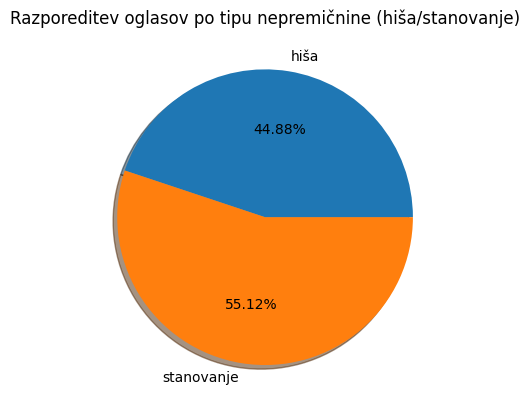

In [280]:
df.groupby('real_estate_type').size().plot.pie(
    title='Razporeditev oglasov po tipu nepremičnine (hiša/stanovanje)',
    autopct='%.2f%%',
    shadow=True,        
    ylabel='',    
)

In [281]:
df['real_estate_type'].value_counts()

real_estate_type
stanovanje    4153
hiša          3382
Name: count, dtype: int64

Oglejmo si tudi razporeditev oglasov po tipu oglasa (prodaja/oddaja) in tipu nepremičnine (hiša/stanovanje) hkrati.

<Axes: title={'center': 'Razporeditev oglasov po tipu oglasa (prodaja/oddaja) in tipu nepremičnine (hiša/stanovanje)'}>

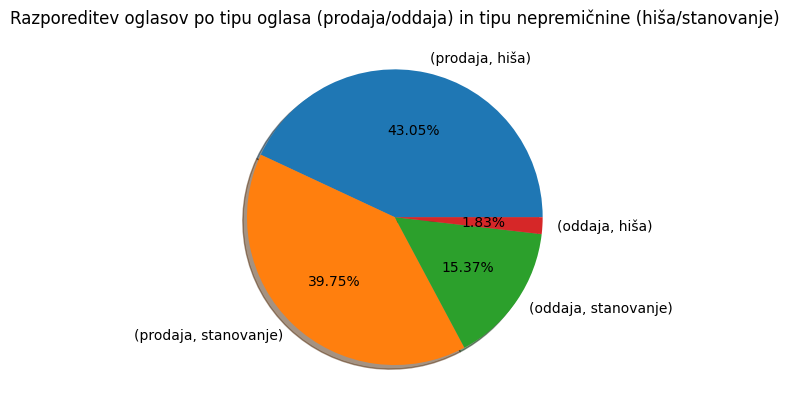

In [282]:
df[['ad_type', 'real_estate_type']].value_counts().plot.pie(
    title='Razporeditev oglasov po tipu oglasa (prodaja/oddaja) in tipu nepremičnine (hiša/stanovanje)',
    autopct='%.2f%%',
    shadow=True,        
    ylabel='',    
)

In [283]:
df[['ad_type', 'real_estate_type']].value_counts()

ad_type  real_estate_type
prodaja  hiša                3244
         stanovanje          2995
oddaja   stanovanje          1158
         hiša                 138
Name: count, dtype: int64

## Geografska razporeditev

Zdaj bomo prikazali razporeditev nepremičninskih oglasov po različnih regijah. Ta geografska analiza bo razkrila območja z visoko koncentracijo oglasov, kar lahko kaže na vroče točke trga ali razlike v razpoložljivosti nepremičnin.

<Axes: title={'center': 'Geografska razporeditev'}, ylabel='region'>

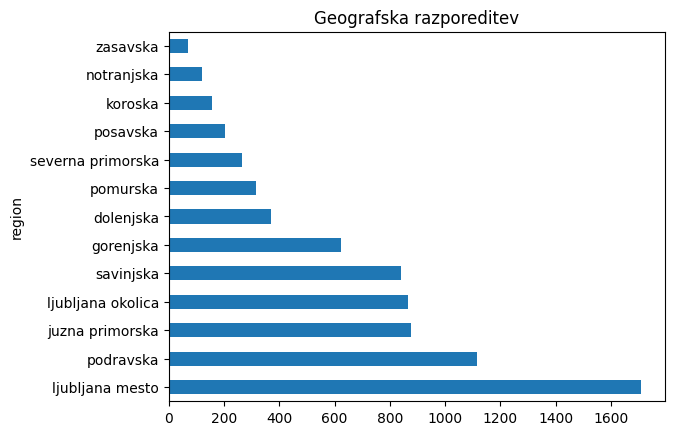

In [284]:
df['region'].value_counts().plot.barh(
    title="Geografska razporeditev"
)

In [285]:
df['region'].value_counts()

region
ljubljana mesto      1710
podravska            1116
juzna primorska       876
ljubljana okolica     866
savinjska             840
gorenjska             623
dolenjska             371
pomurska              316
severna primorska     264
posavska              205
koroska               158
notranjska            122
zasavska               68
Name: count, dtype: int64

## Sklep

Po kratkem pregledu trga lahko zaključimo, da na njem prevladujejo oglasi za prodajo nepremičnin. Pri tem je razdelitev med prodajo stanovanj in hiš enaka, medtem ko se veliko več stanovanj oddaja v najem.

Če pogledamo razporeditev po regijah, je vidno, da je največ ponudb v Ljubljani.

***
# Analiza cen

V tem razdelku bomo analizirali razporeditev in trende cen nepremičnin. To vključuje preučevanje splošne razporeditve cen, izračun povprečnih in medianih cen za različne tipe nepremičnin ter raziskovanje, kako se cene razlikujejo glede na regijo. Prav tako bomo raziskali razmerje med ceno in značilnostmi nepremičnin, kot so površina in število sob.

Posebej si bomo ogledali tudi specifične nepremičnine: samostojne hiše in 2-3 sobna stanovanja za prodajo, saj so po skromnem mnenju avtorja to najboljše nepremičnine za nakup, ter sobe, garsonjere in enosobna stanovanja za najem, saj so najbolj primerna za najem študentom.

## Razporeditev cen

Najprej bomo preučili splošno razporeditev cen nepremičnin. To vključuje vizualizacijo razporeditve cen na trgu in razumevanje splošnega cenovnega razpona za prodajo in oddajo. Ta analiza zagotavlja osnovo za globlje vpoglede v cenovne trende.

### Razporeditev cen (prodaja)

Za začetek si oglejmo 5 najdražjih in 5 najcenejših ponudb:

In [286]:
sell_df.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6826989,prodaja,hiša,ljubljana mesto,ljubljana,samostojna,474.88,870.0,p+1+2,2024,4161000.0,baza agencija d.o.o.
6827424,prodaja,hiša,gorenjska,kranjska gora,drugo,670.00,470.0,NaN,2020,3950000.0,dom real d.o.o.
6589216,prodaja,stanovanje,ljubljana mesto,ljubljana,5 in večsobno,390.30,NaN,6/7,2022,3932029.0,"ab nepremičnine, agencija za posredovanje v pr..."
6570641,prodaja,hiša,juzna primorska,malija,samostojna,1744.00,33103.0,k+p+1,2007,3900000.0,"aeon nepremičnine, d.o.o."
6824859,prodaja,hiša,severna primorska,kneža,drugo,760.00,28600.0,k+p+1+2/k+p+1+2,1988,3800000.0,zasebna ponudba


In [287]:
sell_df.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6550925,prodaja,hiša,gorenjska,bohinjska bistrica,samostojna,13.66,44.05,NaN,1945,14500.0,"sdh, d.d."
6835049,prodaja,hiša,dolenjska,rajhenav,drugo,55.20,320.00,NaN,1958,15000.0,zavod za gozdove slovenije
6748385,prodaja,hiša,pomurska,lončarovci,samostojna,55.60,1663.00,NaN,1923,19000.0,"nepremičnine djm, posredništvo, mirjana kouter..."
6821318,prodaja,hiša,pomurska,čentiba,samostojna,76.00,2772.00,k+p+m,1990,19000.0,zasebna ponudba
6840678,prodaja,hiša,podravska,podgorci,samostojna,100.00,185.00,NaN,1980,19999.0,zasebna ponudba


Izračunajmo razliko med najdražjim in najcenejšim oglasom:

In [288]:
print(f'Razlika je {float(sell_df['price'].max() - sell_df['price'].min())} evrov.')

Razlika je 4146500.0 evrov.


Oglejmo si najdražje in najcenejše samostojne hiše ter 2-3 sobna stanovanja.

**Samostojne hiše:**

In [289]:
single_homes = sell_df[(sell_df['real_estate_type'] == 'hiša') & (sell_df['type'] == 'samostojna')]
single_homes.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6826989,prodaja,hiša,ljubljana mesto,ljubljana,samostojna,474.88,870.0,p+1+2,2024,4161000.0,baza agencija d.o.o.
6570641,prodaja,hiša,juzna primorska,malija,samostojna,1744.00,33103.0,k+p+1,2007,3900000.0,"aeon nepremičnine, d.o.o."
5610784,prodaja,hiša,juzna primorska,portorož,samostojna,642.00,1606.0,NaN,1969,3600000.0,ruj nepremičnine d.o.o.
6822160,prodaja,hiša,ljubljana mesto,ljubljana,samostojna,433.50,NaN,p+1+2,2023,3390000.0,baza agencija d.o.o.
6732534,prodaja,hiša,juzna primorska,koper,samostojna,438.00,6088.0,NaN,1987,3350000.0,"urbanistika, družba za projektiranje, inženiri..."


In [290]:
single_homes.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6550925,prodaja,hiša,gorenjska,bohinjska bistrica,samostojna,13.66,44.05,NaN,1945,14500.0,"sdh, d.d."
6748385,prodaja,hiša,pomurska,lončarovci,samostojna,55.60,1663.00,NaN,1923,19000.0,"nepremičnine djm, posredništvo, mirjana kouter..."
6821318,prodaja,hiša,pomurska,čentiba,samostojna,76.00,2772.00,k+p+m,1990,19000.0,zasebna ponudba
6840678,prodaja,hiša,podravska,podgorci,samostojna,100.00,185.00,NaN,1980,19999.0,zasebna ponudba
6536083,prodaja,hiša,dolenjska,stranska vas,samostojna,64.00,117.00,NaN,1930,20000.0,nnrn nepremičnine d.o.o. novo mesto


**2-sobna stanovanja:**

In [291]:
two_room_apartments = sell_df[(sell_df['real_estate_type'] == 'stanovanje') & ((sell_df['type'] == '2-sobno') | (sell_df['type'] == '2,5-sobno'))]
two_room_apartments.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6743760,prodaja,stanovanje,ljubljana mesto,ljubljana,2-sobno,90.00,NaN,6/7,2023,977600.0,tivoli d.o.o.
6719365,prodaja,stanovanje,ljubljana mesto,ljubljana,2-sobno,134.20,NaN,5/5,2025,652000.0,"brn nepremičnine, bojan radusinović s.p."
6759055,prodaja,stanovanje,ljubljana mesto,ljubljana,2-sobno,88.50,NaN,NaN,2009,635000.0,dom real d.o.o.
6761576,prodaja,stanovanje,ljubljana mesto,ljubljana,2-sobno,88.50,NaN,me,2009,635000.0,rocco nepremičnine d.o.o.
6788744,prodaja,stanovanje,ljubljana mesto,ljubljana,2-sobno,136.74,NaN,4/4,1997,619095.0,"stoja trade, d.o.o., ljubljana"


In [292]:
two_room_apartments.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6835710,prodaja,stanovanje,koroska,janževski vrh,2-sobno,81.5,NaN,1,1850,47000.0,stanovanjski sklad rs
6837721,prodaja,stanovanje,pomurska,podgradje,"2,5-sobno",55.7,NaN,vp/4,1878,47345.0,puklavec family wines d.o.o.
6837730,prodaja,stanovanje,pomurska,podgradje,"2,5-sobno",55.7,NaN,vp/4,1878,47345.0,puklavec family wines d.o.o.
6480694,prodaja,stanovanje,zasavska,trbovlje,"2,5-sobno",56.7,NaN,2/2,1885,48000.0,cic d.o.o.
6550851,prodaja,stanovanje,podravska,hotinja vas,2-sobno,47.9,648.0,NaN,1970,49000.0,"sdh, d.d."


**3-sobna stanovanja:**

In [293]:
three_room_apartments = sell_df[(sell_df['real_estate_type'] == 'stanovanje') & (sell_df['type'] == '3-sobno')]
three_room_apartments.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6783879,prodaja,stanovanje,ljubljana mesto,ljubljana,3-sobno,147.0,NaN,3/7,2023,1538400.0,tivoli d.o.o.
6466171,prodaja,stanovanje,ljubljana okolica,medvode,3-sobno,366.7,NaN,2/2,2019,1337660.0,ljubljana nepremičnine d.o.o.
6744773,prodaja,stanovanje,ljubljana mesto,ljubljana,3-sobno,187.2,NaN,14/14,2020,1200000.0,rcn d.o.o.
6745383,prodaja,stanovanje,ljubljana mesto,ljubljana,3-sobno,125.0,NaN,5/7,2023,1181400.0,tivoli d.o.o.
6493869,prodaja,stanovanje,ljubljana mesto,ljubljana,3-sobno,297.6,NaN,1/4,2009,1150000.0,"stoja trade, d.o.o., ljubljana"


In [294]:
three_room_apartments.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6502029,prodaja,stanovanje,podravska,rošpoh - del,3-sobno,138.1,NaN,1,1904,37000.0,"agenti nepremičninsko posredovanje, d.o.o."
6727889,prodaja,stanovanje,pomurska,boračeva,3-sobno,52.3,NaN,1/1,1959,49900.0,market center omnis d.o.o.
6622663,prodaja,stanovanje,dolenjska,črnomelj,3-sobno,64.9,NaN,NaN,1995,64900.0,ecom volt media d.o.o.
6599481,prodaja,stanovanje,savinjska,ljubno ob savinji,3-sobno,67.3,NaN,NaN,1935,70000.0,"janko nepremičnine, ema janko s.p."
6745309,prodaja,stanovanje,savinjska,štore,3-sobno,73.0,NaN,p/3,1880,70000.0,"geopro nepremičnine, d.o.o."


Oglejmo si splošno razporeditev cen.

<Axes: title={'center': 'Razporeditev cen'}, ylabel='Frequency'>

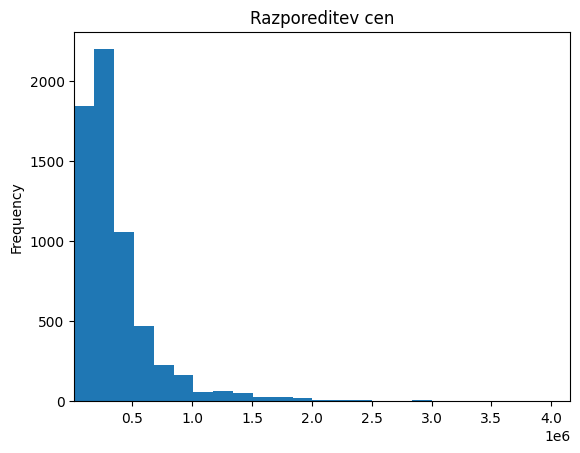

In [295]:
sell_df['price'].plot.hist(
    title='Razporeditev cen',
    bins=25, 
    xlim=[sell_df['price'].min(), sell_df['price'].max()]
)

Opazimo, da večina nepremičnin, ki so naprodaj, stane do 500.000 evrov. Za boljše razumevanje razporeditve cen bomo oglase razdelili v tri cenovne kategorije: od 0 do 500.000 evrov, od 500.000 do 1.000.000 evrov in od 1.000.000 evrov naprej.

<Axes: title={'center': 'Razporeditev cen. Oglasi od 0 do 500.000 evrov'}, ylabel='Frequency'>

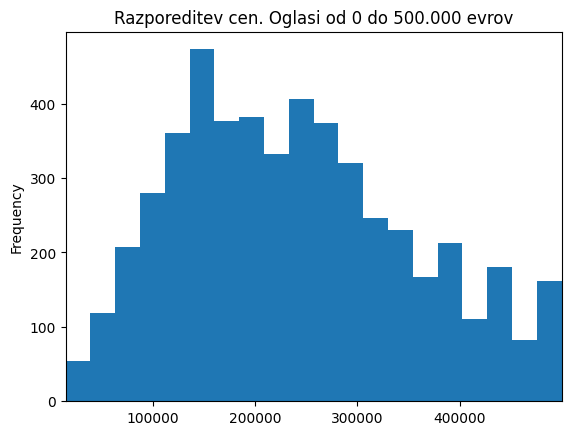

In [296]:
first_group = sell_df[sell_df['price'] < 500000]
first_group['price'].plot.hist(
    title='Razporeditev cen. Oglasi od 0 do 500.000 evrov',
    bins=20, 
    xlim=[first_group['price'].min(), first_group['price'].max()]
)

<Axes: title={'center': 'Razporeditev cen. Oglasi od 500.000 do 1.000.000 evrov'}, ylabel='Frequency'>

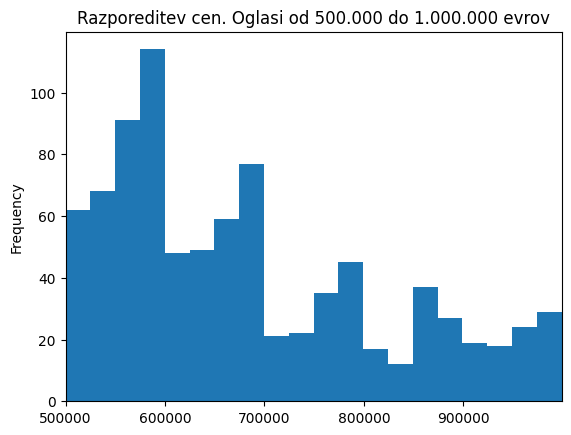

In [297]:
second_group = sell_df[(sell_df['price'] >= 500000) & (sell_df['price'] < 1000000)]
second_group['price'].plot.hist(
    title='Razporeditev cen. Oglasi od 500.000 do 1.000.000 evrov',
    bins=20, 
    xlim=[second_group['price'].min(), second_group['price'].max()]
)

<Axes: title={'center': 'Razporeditev cen. Oglasi od 1.000.000 evrov naprej'}, ylabel='Frequency'>

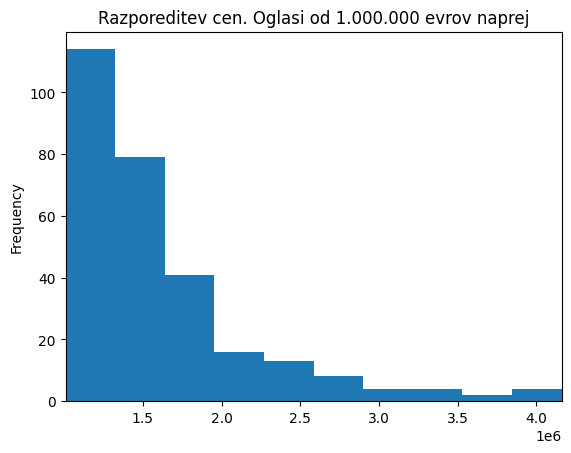

In [298]:
third_group = sell_df[sell_df['price'] > 1000000]
third_group['price'].plot.hist(
    title='Razporeditev cen. Oglasi od 1.000.000 evrov naprej',
    bins=10, 
    xlim=[third_group['price'].min(), third_group['price'].max()]
)

### Razporeditev cen (oddaja)

Spet si oglejmo 5 najdražjih in 5 najcenejših ponudb.

In [299]:
rent_df.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6531465,oddaja,stanovanje,ljubljana mesto,ljubljana,4-sobno,150.00,NaN,NaN,2022,7700.0,"stoja trade, d.o.o., ljubljana"
6836618,oddaja,stanovanje,ljubljana mesto,ljubljana,4-sobno,200.00,NaN,NaN,2024,6000.0,zasebna ponudba
6790043,oddaja,hiša,ljubljana mesto,ljubljana,samostojna,473.00,770.0,NaN,2007,6000.0,"stoja trade, d.o.o., ljubljana"
6521290,oddaja,stanovanje,ljubljana mesto,ljubljana,3-sobno,150.00,NaN,NaN,2022,5500.0,"stoja trade, d.o.o., ljubljana"
6694221,oddaja,hiša,ljubljana mesto,ljubljana,samostojna,247.93,375.0,NaN,2023,4990.0,"stoja trade, d.o.o., ljubljana"


In [300]:
rent_df.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6680231,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,16.0,NaN,NaN,1980,80.0,zasebna ponudba
6754209,oddaja,hiša,ljubljana mesto,ljubljana,samostojna,450.0,800.0,p+1,2000,95.0,zasebna ponudba
6780970,oddaja,stanovanje,dolenjska,dolenja nemška vas,drugo,100.0,1500.0,p/p,2002,100.0,zasebna ponudba
6744326,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,10.0,NaN,NaN,1977,120.0,zasebna ponudba
6689809,oddaja,stanovanje,posavska,sevnica,2-sobno,60.0,NaN,3/4,2005,120.0,zasebna ponudba


Izračunajmo razliko med najdražjim in najcenejšim oglasom.

In [301]:
print(f'Razlika je {float(rent_df['price'].max() - rent_df['price'].min())} evrov.')

Razlika je 7620.0 evrov.


Oglejmo si najdražje in najcenejše sobe, garsonjere in enosobna stanovanja.

**Sobe:**

In [302]:
rooms = rent_df[(rent_df['real_estate_type'] == 'stanovanje') & (rent_df['type'] == 'soba')]
rooms.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6835692,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,18.0,NaN,8/8,1919,600.0,zasebna ponudba
6839075,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,12.0,NaN,1/p+1+m,2022,550.0,zasebna ponudba
6245572,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,18.0,NaN,vp/3,2017,500.0,"agencija tomc, d.o.o."
6839377,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,10.0,NaN,NaN,1964,420.0,zasebna ponudba
6743968,oddaja,stanovanje,ljubljana okolica,verd,soba,25.0,NaN,1/2,2018,420.0,zasebna ponudba


In [303]:
rooms.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6680231,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,16.0,NaN,NaN,1980,80.0,zasebna ponudba
6334505,oddaja,stanovanje,savinjska,velenje,soba,22.0,NaN,1/2,2012,120.0,zasebna ponudba
6744326,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,10.0,NaN,NaN,1977,120.0,zasebna ponudba
6254288,oddaja,stanovanje,savinjska,žalec,soba,30.0,750.0,p+1/2,2018,130.0,zasebna ponudba
6334245,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,20.0,NaN,p/3,2015,150.0,zasebna ponudba


**Garsonjere:**

In [304]:
studios = rent_df[(rent_df['real_estate_type'] == 'stanovanje') & (rent_df['type'] == 'garsonjera')]
studios.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6808892,oddaja,stanovanje,juzna primorska,portorož,garsonjera,30.0,NaN,1,1950,1500.0,zasebna ponudba
6395503,oddaja,stanovanje,ljubljana mesto,ljubljana,garsonjera,27.0,NaN,NaN,1890,1320.0,agencija elite d.o.o.
6837027,oddaja,stanovanje,ljubljana mesto,ljubljana,garsonjera,35.0,NaN,4/5,2006,1200.0,zasebna ponudba
6831124,oddaja,stanovanje,ljubljana mesto,ljubljana,garsonjera,55.0,NaN,pk/4,2024,1000.0,zasebna ponudba
6846330,oddaja,stanovanje,ljubljana okolica,brezje pri grosupljem,garsonjera,38.5,50.0,p/2,2004,850.0,zasebna ponudba


In [305]:
studios.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6841300,oddaja,stanovanje,pomurska,gornja radgona,garsonjera,17.0,NaN,5/5,1967,240.0,zasebna ponudba
6774009,oddaja,stanovanje,savinjska,celje,garsonjera,30.0,NaN,vp,2010,250.0,zasebna ponudba
6839311,oddaja,stanovanje,zasavska,trbovlje,garsonjera,28.0,NaN,p,1965,250.0,zasebna ponudba
6778847,oddaja,stanovanje,koroska,šentjanž pri dravogradu,garsonjera,24.0,NaN,1/3,1900,250.0,"nepremičninska družba, d.o.o., pe re/max premium"
6733235,oddaja,stanovanje,podravska,maribor,garsonjera,19.0,NaN,NaN,1983,270.0,zasebna ponudba


**1-sobna stanovanja:**

In [306]:
one_room_apartments = rent_df[(rent_df['real_estate_type'] == 'stanovanje') & (rent_df['type'] == '1-sobno')]
one_room_apartments.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6821522,oddaja,stanovanje,ljubljana mesto,ljubljana,1-sobno,83.0,NaN,m/m,1520,1600.0,zasebna ponudba
6738270,oddaja,stanovanje,ljubljana mesto,ljubljana,1-sobno,45.0,NaN,NaN,2003,1200.0,zasebna ponudba
6508408,oddaja,stanovanje,juzna primorska,koper,1-sobno,55.0,NaN,1/1,2020,1100.0,zasebna ponudba
6835333,oddaja,stanovanje,ljubljana mesto,ljubljana,1-sobno,51.4,NaN,NaN,1600,1100.0,"aeon nepremičnine, d.o.o."
6825032,oddaja,stanovanje,gorenjska,kranj,1-sobno,50.0,NaN,p/2,2023,1000.0,zasebna ponudba


In [307]:
one_room_apartments.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
ad_id,,,,,,,,,,,
6507944,oddaja,stanovanje,posavska,cerklje ob krki,1-sobno,50.0,NaN,1,1993,200.0,zasebna ponudba
6728409,oddaja,stanovanje,dolenjska,kočevska reka,1-sobno,23.0,NaN,p/1,1950,200.0,zasebna ponudba
6828267,oddaja,stanovanje,dolenjska,črnomelj,1-sobno,23.0,NaN,p/4,1984,220.0,zasebna ponudba
6840638,oddaja,stanovanje,savinjska,celje,1-sobno,30.0,NaN,11/11,1974,300.0,zasebna ponudba
6838784,oddaja,stanovanje,savinjska,žiče,1-sobno,35.0,NaN,p,2020,300.0,zasebna ponudba


Oglejmo si splošno razporeditev cen.

<Axes: title={'center': 'Razporeditev cen'}, ylabel='Frequency'>

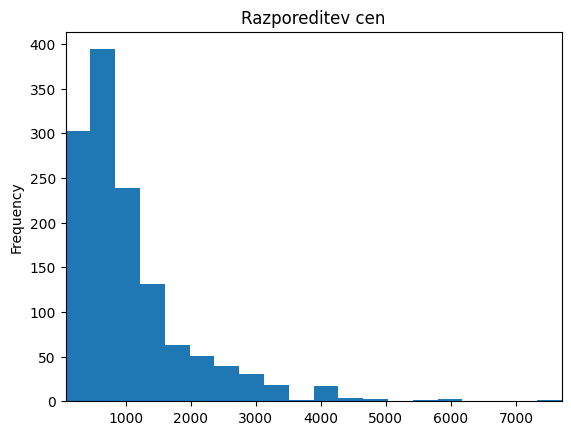

In [308]:
rent_df['price'].plot.hist(
    title='Razporeditev cen',
    bins=20, 
    xlim=[rent_df['price'].min(), rent_df['price'].max()]
)

Opazimo, da je večina oglasov za najem stanovanj v cenovnem razponu od 0 do 1000 evrov/mesec, zato bomo podrobneje pogledali razporeditev oglasov v tem cenovnem razponu.

<Axes: title={'center': 'Razporeditev cen. Oglasi od 0 do 1000 evrov'}, ylabel='Frequency'>

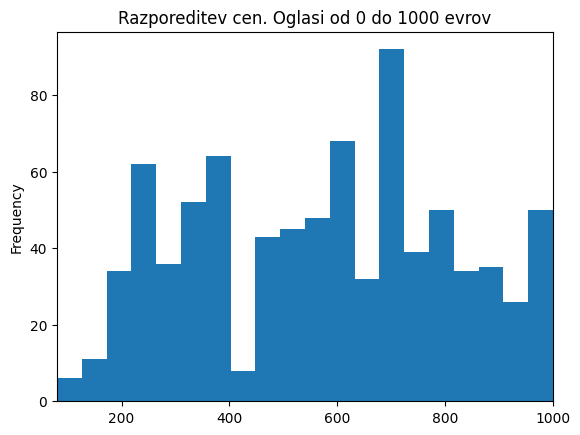

In [309]:
first_group = rent_df[rent_df['price'] <= 1000]
first_group['price'].plot.hist(
    title='Razporeditev cen. Oglasi od 0 do 1000 evrov',
    bins=20, 
    xlim=[first_group['price'].min(), first_group['price'].max()]
)

##  Povprečne in mediane cene

V tem podrazdelku bomo izračunali in primerjali povprečne in mediane cene nepremičnin. Analiza bo segmentirana po tipu nepremičnine (hiše, stanovanja) in tipu oglasa (prodaja, najem), da bi izpostavili morebitne razlike. Razumevanje teh mer centralne tendence pomaga oceniti tipične tržne cene.

### Povprečne in mediane cene (prodaja)

Izračunajmo povprečne in mediane vrednosti cene prodaje hiš in stanovanj.

In [310]:
sell_df.groupby('real_estate_type')['price'].agg(['mean', 'median'])

,mean,median
real_estate_type,,
hiša,426533.337198,299000.0
stanovanje,299684.697553,245000.0


Posebej bomo pregledali povprečne in mediane cene prodaje samostojnih hiš in 2-3 sobnih stanovanj.

**Samostojne hiše:**

In [311]:
single_homes['price'].agg(['mean', 'median'])

mean      427086.504063
median    280417.500000
Name: price, dtype: float64

**2-sobni stanovanja:**

In [312]:
two_room_apartments['price'].agg(['mean', 'median'])

mean      203421.631709
median    180000.000000
Name: price, dtype: float64

**3-sobni stanovanja:**

In [313]:
three_room_apartments['price'].agg(['mean', 'median'])

mean      305474.056449
median    264900.000000
Name: price, dtype: float64

### Povprečne in mediane cene (oddaja)

Izračunajmo povprečne in mediane vrednosti cene najema hiš in stanovanj.

In [314]:
rent_df.groupby('real_estate_type')['price'].agg(['mean', 'median'])

,mean,median
real_estate_type,,
hiša,1909.442029,1800.0
stanovanje,961.945941,722.5


Posebej bomo pregledali povprečne in mediane cene najema sob, garsonjer in 1 sobnih stanovanj.

**Sobe:**

In [315]:
rooms['price'].agg(['mean', 'median'])

mean      262.462121
median    250.000000
Name: price, dtype: float64

**Garsonjere:**

In [316]:
studios['price'].agg(['mean', 'median'])

mean      551.572368
median    550.000000
Name: price, dtype: float64

**1-sobni stanovanja:**

In [317]:
one_room_apartments['price'].agg(['mean', 'median'])

mean      595.585938
median    600.000000
Name: price, dtype: float64

## Regionalne razlike v cenah

Tukaj bomo raziskali, kako se cene nepremičnin razlikujejo po različnih regijah in mestih. S primerjavo povprečnih cen na različnih lokacijah lahko prepoznamo dražja in cenejša območja, kar nam omogoča vpogled v regionalno dinamiko cen.

### Regionalne razlike v cenah (prodaja)

Oglejmo si, kako se povprečne in mediane cene spreminjajo glede na regijo:

In [318]:
sell_df.groupby('region')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False])

,mean,median
region,,
ljubljana mesto,566099.432977,449000.000
juzna primorska,514363.675343,365000.000
ljubljana okolica,441679.400000,350000.000
gorenjska,384061.235701,279881.875
severna primorska,273339.558207,195000.000
savinjska,261190.956689,198000.000
podravska,246256.906653,199809.315
posavska,227775.313882,193500.000
dolenjska,217642.723623,198498.325


<Axes: title={'center': 'Regionalne razlike v cenah'}, ylabel='region'>

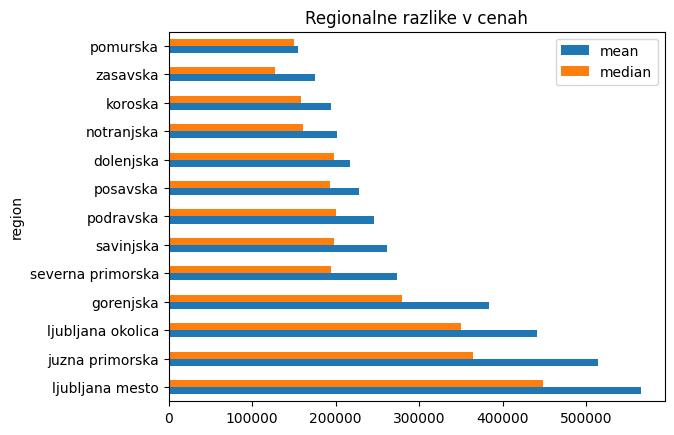

In [319]:
sell_df.groupby('region')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).plot.barh(
    title='Regionalne razlike v cenah'
)

Vidimo, da so najdražje nepremičnine v Ljubljani, njene okolice in na morju.

Zdaj si bomo ogledali 10 najdražjih mest za nakup nepremičnin, v katerih je objavljenih vsaj 25 oglasov.

In [320]:
cities_25 = []
for city in set(sell_df['city']):
    if int(sell_df['city'].value_counts()[city]) >= 25:
        cities_25.append(city)

In [321]:
sell_df[sell_df['city'].isin(cities_25)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10)

,mean,median
city,,
portorož,912840.000000,690000.0
kranjska gora,731101.085714,517350.0
bled,637666.666667,595000.0
ljubljana,566099.432977,449000.0
koper,521389.648810,401623.5
medvode,508349.488372,460000.0
izola,463263.157093,347500.0
piran,421745.783133,312000.0
škofljica,417862.962963,322560.0


<Axes: title={'center': 'Mestne razlike v cenah (mesta z vsaj 25 oglasov)'}, ylabel='city'>

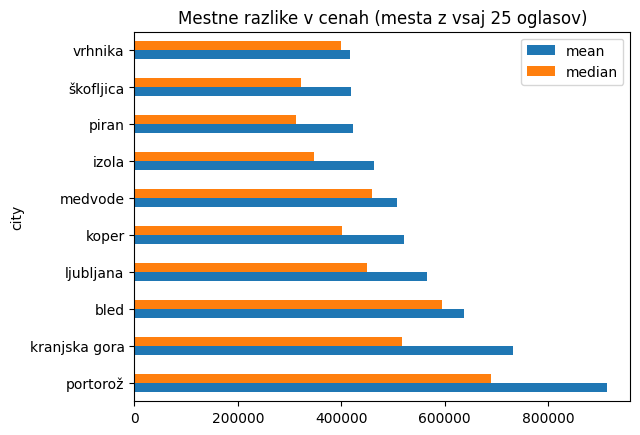

In [322]:
sell_df[sell_df['city'].isin(cities_25)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10).plot.barh(
    title='Mestne razlike v cenah (mesta z vsaj 25 oglasov)'
)

In enako bomo storili z mesti, v katerih je objavljenih več kot 100 oglasov.

In [323]:
cities_100 = []
for city in set(sell_df['city']):
    if int(sell_df['city'].value_counts()[city]) >= 100:
        cities_100.append(city)

In [324]:
sell_df[sell_df['city'].isin(cities_100)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10)

,mean,median
city,,
ljubljana,566099.432977,449000.00
koper,521389.648810,401623.50
kranj,352036.809355,270418.75
celje,284051.028481,194950.00
novo mesto,251958.822960,248480.87


<Axes: title={'center': 'Mestne razlike v cenah (mesta z več kot 100 oglasov)'}, ylabel='city'>

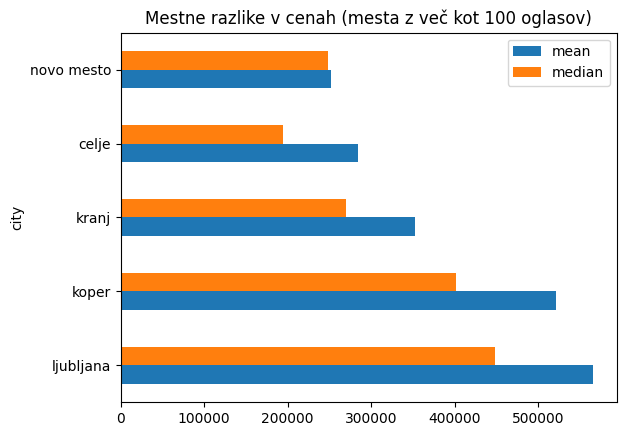

In [325]:
sell_df[sell_df['city'].isin(cities_100)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10).plot.barh(
    title='Mestne razlike v cenah (mesta z več kot 100 oglasov)'
)

### Regionalne razlike v cenah (oddaja)

Oglejmo si, kako se povprečne in mediane cene spreminjajo glede na regijo:

In [326]:
rent_df.groupby('region')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False])

,mean,median
region,,
ljubljana mesto,1431.925606,1170.0
ljubljana okolica,1173.361345,900.0
juzna primorska,908.389831,725.0
gorenjska,873.600000,800.0
podravska,608.232394,550.0
posavska,600.000000,400.0
severna primorska,576.338462,520.0
savinjska,559.403670,500.0
notranjska,538.750000,475.0


<Axes: title={'center': 'Regionalne razlike v cenah'}, ylabel='region'>

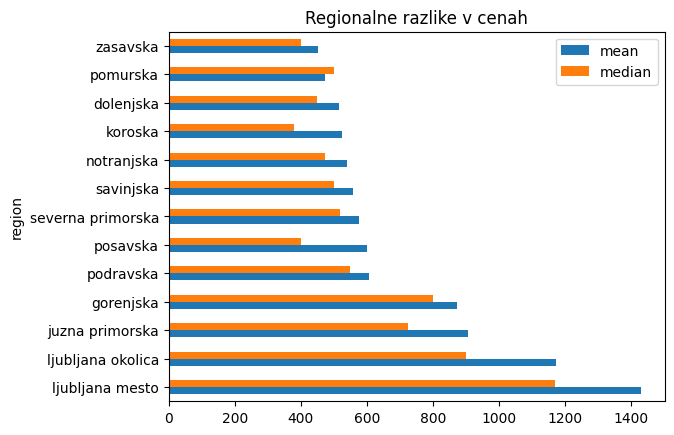

In [327]:
rent_df.groupby('region')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).plot.barh(
    title='Regionalne razlike v cenah'
)

Spet vidimo, da so najdražje nepremičnine za najem v Ljubljani, njene okolice in na morju.

Zdaj si bomo ogledali 10 najdražjih mest za najem nepremičnin, v katerih je objavljenih vsaj 10 oglasov.

In [328]:
cities_25_rent = []
for city in set(rent_df['city']):
    if int(rent_df['city'].value_counts()[city]) >= 10:
        cities_25_rent.append(city)

In [329]:
rent_df[rent_df['city'].isin(cities_25_rent)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10)

,mean,median
city,,
ljubljana,1431.925606,1170.0
portorož,1018.181818,800.0
bled,990.000000,800.0
kranj,963.636364,1088.0
domžale,889.230769,800.0
piran,877.500000,600.0
koper,874.324324,700.0
izola,803.076923,650.0
celje,677.432432,600.0


<Axes: title={'center': 'Mestne razlike v cenah (mesta z vsaj 10 oglasov)'}, ylabel='city'>

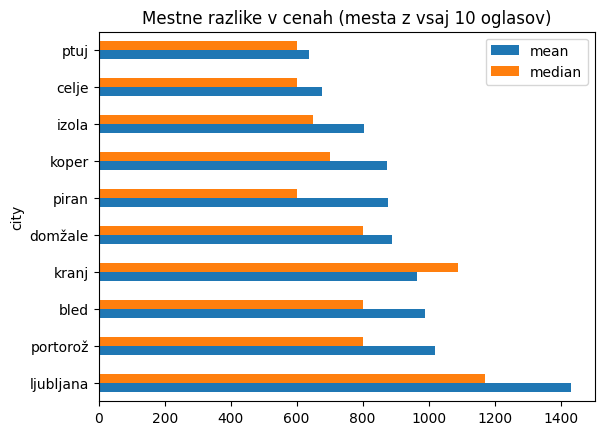

In [330]:
rent_df[rent_df['city'].isin(cities_25_rent)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10).plot.barh(
    title='Mestne razlike v cenah (mesta z vsaj 10 oglasov)'
)

In enako bomo storili z mesti, v katerih je objavljenih več kot 25 oglasov.

In [331]:
cities_100_rent = []
for city in set(rent_df['city']):
    if int(rent_df['city'].value_counts()[city]) >= 25:
        cities_100_rent.append(city)

In [332]:
rent_df[rent_df['city'].isin(cities_100_rent)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10)

,mean,median
city,,
ljubljana,1431.925606,1170.0
koper,874.324324,700.0
celje,677.432432,600.0
maribor,575.833333,550.0


<Axes: title={'center': 'Mestne razlike v cenah (mesta z več kot 25 oglasov)'}, ylabel='city'>

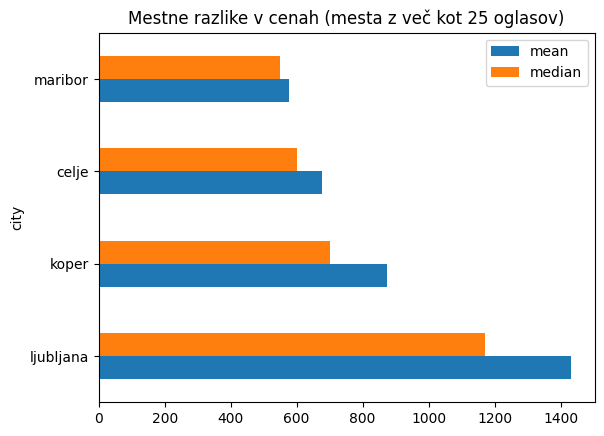

In [333]:
rent_df[rent_df['city'].isin(cities_100_rent)].groupby('city')['price'].agg(['mean', 'median']).sort_values(['mean', 'median'], ascending=[False, False]).head(10).plot.barh(
    title='Mestne razlike v cenah (mesta z več kot 25 oglasov)'
)

***
# Poglavje 3
# Analiza značilnosti nepremičnin

Ta razdelek se osredotoča na analizo specifičnih značilnosti nepremičnin, kot so leto gradnje in površina. Raziskali bomo, kako ti dejavniki vplivajo na cene nepremičnin in druge tržne dinamike. Razumevanje teh značilnosti lahko zagotovi globlje vpoglede v to, kaj vpliva na vrednost nepremičnine.

Na začetku poglavja si bomo ogledali, kako so vse zanimive značilnosti (region, mesto, bivalni prostor, površina zemljišča, leto gradnje in cena) povezane med seboj. Za to bomo vse zanimive podatke tipa `string` pretvorili v številčno obliko (regije in mesta bomo ocenili glede na število oglasov v njih) in narisali korelacijsko matriko.

Omejili se bomo samo na oglase za prodajo.

In [334]:
def interpreter(data_frame, column_index, transitional_dict):

    for i_id, object_ in enumerate(data_frame.iloc [:, column_index]):
        numeric_df.iat[i_id, column_index] = transitional_dict[object_]

In [335]:
transitional_dict_regions = {}
for region in set(sell_df['region']):
    points = int(sell_df.groupby('region').size()[region])
    transitional_dict_regions[region] = points

In [336]:
transitional_dict_cities = {}
for city in set(sell_df['city']):
    points = int(sell_df.groupby('city').size()[city])
    transitional_dict_cities[city] = points

In [337]:
numeric_df = sell_df.copy()

interpreter(numeric_df, 2, transitional_dict_regions)
numeric_df['region'] = numeric_df['region'].astype(int)

interpreter(numeric_df, 3, transitional_dict_cities)
numeric_df['city'] = numeric_df['city'].astype(int)

Text(0.5, 1.0, 'Korelacijska matrika')

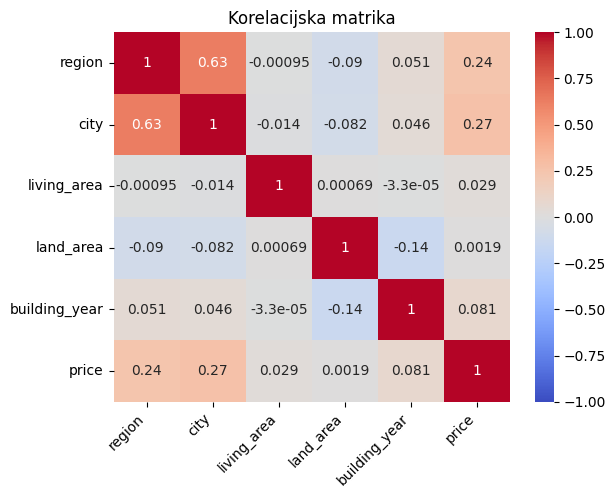

In [338]:
numeric_df = numeric_df.select_dtypes(include=np.number)
matrix = numeric_df.corr()
sbn.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(rotation=45, ha="right")
plt.title("Korelacijska matrika")

Vidimo, da na ceno najbolj vplivata regija in mesto. Vpliv bivalnega prostora in leta gradnje se zdi zanemarljiv. Da bi ugotovili, ali je to res tako, bomo preučili, kako te značilnosti nepremičnine vplivajo na njeno vrednost v posameznih regijah.

## Leto gradnje

V tem podrazdelku bomo analizirali razporeditev nepremičnin glede na leto gradnje. Prav tako bomo primerjali, kako starost nepremičnine vpliva na njeno ceno in druge značilnosti. Ta analiza lahko razkrije trende, povezane s povpraševanjem po starejših ali novejših nepremičninah.

Za začetek si bomo ogledali razporeditev števila oglasov glede na leto gradnje.

<Axes: title={'center': 'Razporeditev števila oglasov glede na leto gradnje'}, ylabel='Frequency'>

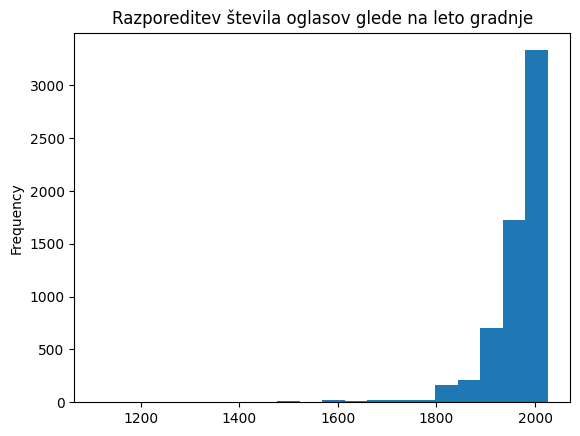

In [412]:
sell_df['building_year'].plot.hist(
    title='Razporeditev števila oglasov glede na leto gradnje',
    bins=20
)

Vidimo, da so na trgu v prevladujočem številu predstavljeni objekti, zgrajeni po letu 1900. Zato si bomo ogledali, kako leto gradnje za objekte, zgrajene po letu 1900, vpliva na njihovo ceno v regijah, kot sta Ljubljana in Južna Primorska.

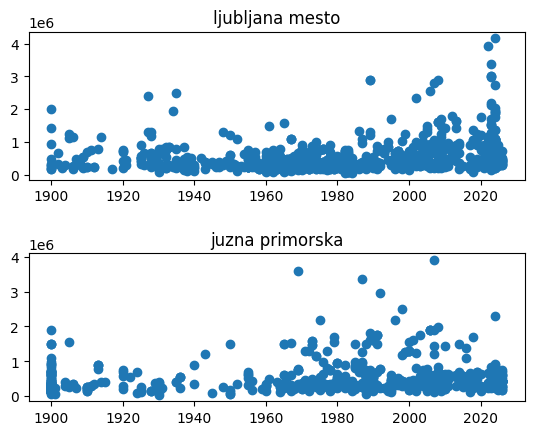

In [416]:
for index, region in enumerate(['ljubljana mesto', 'juzna primorska']):
    tmp_df = sell_df[(sell_df['region'] == region) & ((sell_df['building_year'] >= 1900))]
    
    plt.subplot (2, 1, index + 1)
    plt.scatter(
        x=tmp_df['building_year'], 
        y=tmp_df['price']
    )
    plt.title(region)
    plt.subplots_adjust(hspace=0.5)

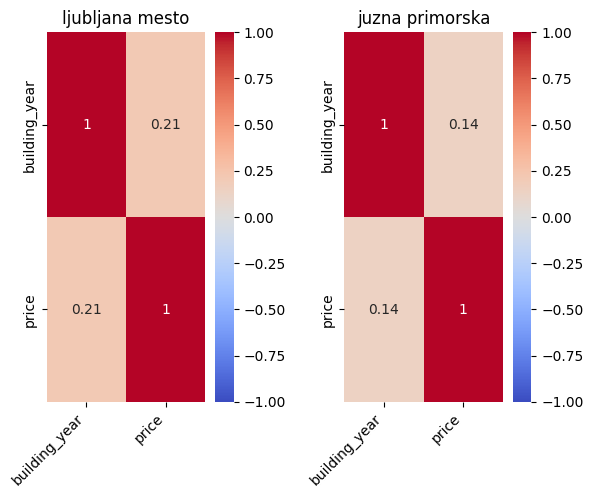

In [415]:
for index, region in enumerate(['ljubljana mesto', 'juzna primorska']):
    tmp_df = sell_df[(sell_df['region'] == region) & ((sell_df['building_year'] >= 1900))]
    
    plt.subplot (1, 2, index + 1)
    matrix_ljubljana = tmp_df[['building_year', 'price']].corr()
    sbn.heatmap(matrix_ljubljana, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.xticks(rotation=45, ha="right")
    plt.title(region)
    plt.subplots_adjust(wspace=0.5)

Vidimo, da leto gradnje dejansko skoraj ne vpliva na vrednost nepremičnine.

Vidimo, da se potrjuje malo vpliva leta gradnje na vrednost nepremičnine.